## Assignment
### 1. Use Multivariate Linear Model
### 2. Use decision tree classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=sns.load_dataset("iris")
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [3]:
df.isnull().sum() / len(df) * 100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [9]:
df["sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

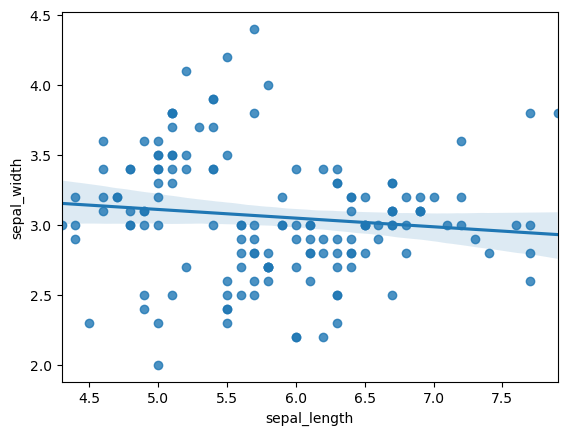

In [10]:
sns.regplot(x="sepal_length",y="sepal_width",data=df)

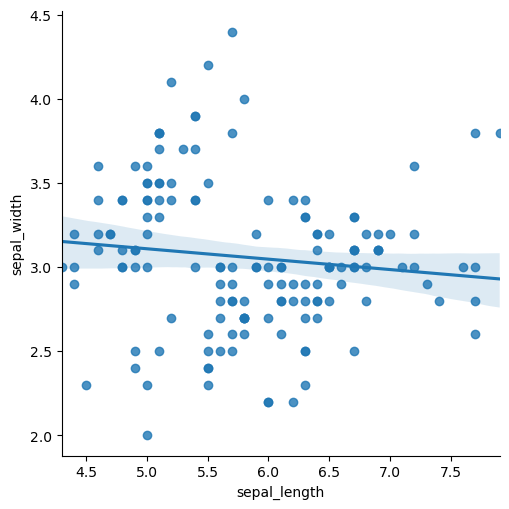

In [11]:
sns.lmplot(x="sepal_length",y="sepal_width",data=df)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

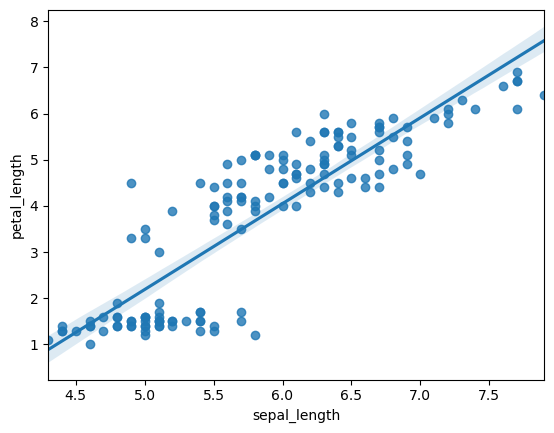

In [12]:
sns.regplot(x="sepal_length",y="petal_length",data=df)

### Linear Model

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
from sklearn.metrics import confusion_matrix

In [5]:
X = pd.DataFrame(df[["sepal_length","sepal_width","petal_length"]])
y= pd.DataFrame(df["petal_width"])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
X_train.shape, y_train.shape

((120, 3), (120, 1))

In [20]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [21]:
model.score(X_test,y_test)

0.932951289876894

In [22]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true = y_test , y_pred = y_pred)
rmse = np.sqrt(mae)
r2 = r2_score(y_true = y_test, y_pred= y_pred)

In [28]:
print("Mean Absolute Error:\t",mae)
print("Mean Square Error:\t",mse)
print("Root Mean Square Error:\t",rmse)
print("R2 Erro:  \t\t",r2)



Mean Absolute Error:	 0.13685311555763588
Mean Square Error:	 0.03556263584929541
Root Mean Square Error:	 0.36993663721999187
R2 Erro:  		 0.932951289876894


In [30]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Confusion Matrix Is For Classification Yaaaaaaar

ValueError: continuous is not supported

# Decision Tree

In [31]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [33]:
X=df.drop(["species"],axis=1)
y=df["species"]

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

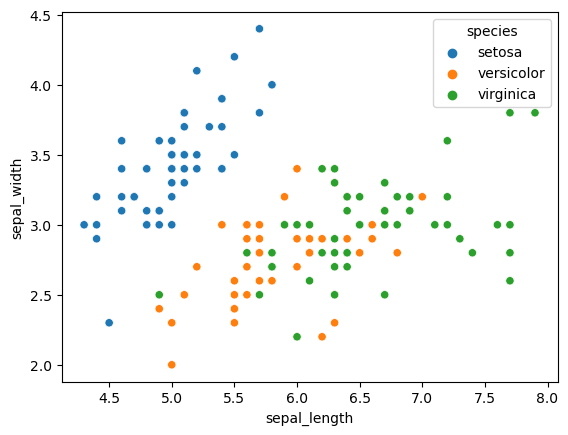

In [37]:
sns.scatterplot(x="sepal_length",y="sepal_width",data=df,hue="species")

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

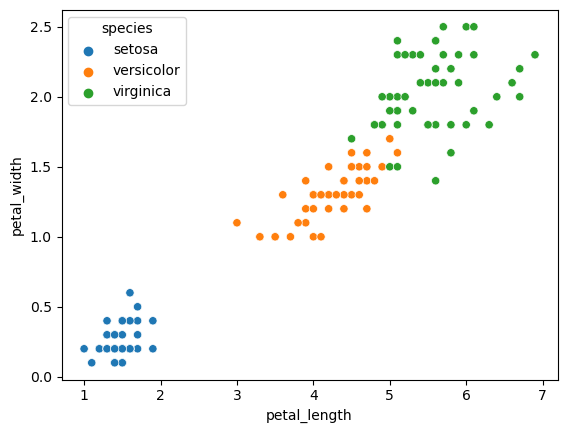

In [38]:
sns.scatterplot(x="petal_length",y="petal_width",data=df,hue="species")

In [42]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='sepal_width'>

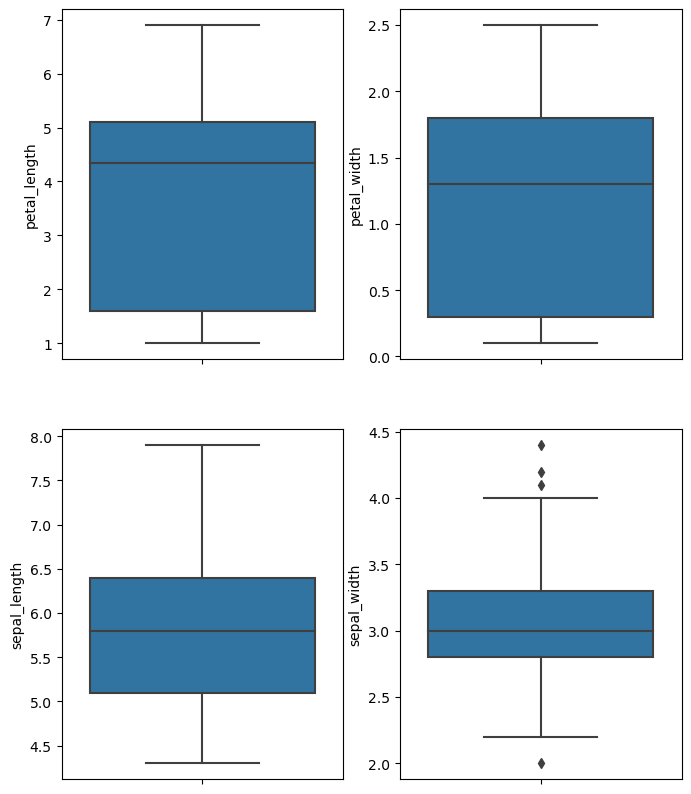

In [45]:
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.boxplot(y=df["petal_length"])
plt.subplot(2,2,2)
sns.boxplot(y=df["petal_width"])
plt.subplot(2,2,3)
sns.boxplot(y=df["sepal_length"])
plt.subplot(2,2,4)
sns.boxplot(y=df["sepal_width"])

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtmodel=DecisionTreeClassifier()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [49]:
X_train.shape,y_train.shape

((120, 4), (120,))

In [48]:
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
dtmodel.score(X_test,y_test)

0.8666666666666667

In [51]:
y_pred=dtmodel.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

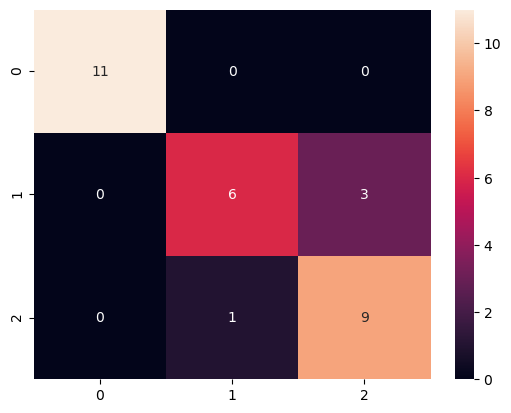

In [53]:
sns.heatmap(cm,annot=True)

In [58]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score

In [71]:
from sklearn.metrics import classification_report

In [62]:
f1_score(y_true=y_test,y_pred=y_pred,average="weighted")


0.8643939393939394

In [64]:
recall_score(y_true=y_test,y_pred=y_pred,average="weighted")

0.8666666666666667

In [65]:
precision_score(y_true=y_test,y_pred=y_pred,average="weighted")

0.8738095238095238

In [67]:
accuracy_score(y_true=y_test,y_pred=y_pred)

0.8666666666666667

In [72]:
print ('Accuracy:', accuracy_score(y_test, y_pred))

print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

print ('Recall:', recall_score(y_test, y_pred,average='weighted'))

print ('Precision:', precision_score(y_test, y_pred,average='weighted'))

print ('\n clasification report:\n', classification_report(y_test,y_pred))

print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.8666666666666667
F1 score: 0.8643939393939394
Recall: 0.8666666666666667
Precision: 0.8738095238095238

 clasification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.86      0.67      0.75         9
   virginica       0.75      0.90      0.82        10

    accuracy                           0.87        30
   macro avg       0.87      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30


 confussion matrix:
 [[11  0  0]
 [ 0  6  3]
 [ 0  1  9]]
